In [29]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [32]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

In [35]:
Measurment = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [36]:
last_date = session.query(func.max(Measurment.date)).scalar()
last_date

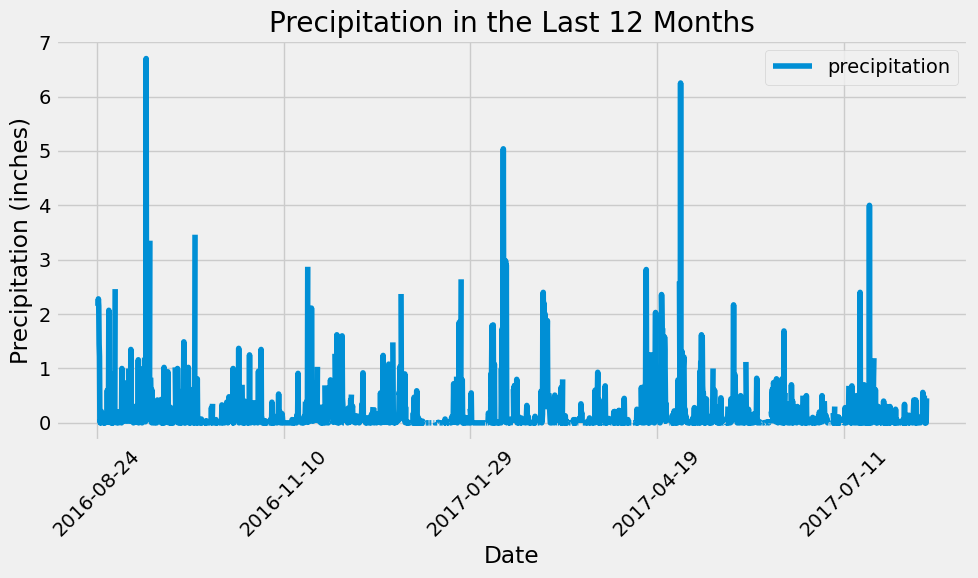

In [38]:
recent_date = session.query(func.max(Measurment.date)).scalar()
year_ago_date = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

resultados = session.query(Measurment.date, Measurment.prcp).\
    filter(Measurment.date >= year_ago_date).all()

df = pd.DataFrame(resultados, columns=['date', 'precipitation'])

df = df.sort_values('date')

df.set_index('date', inplace=True)

df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [39]:
summary_stats = pd.DataFrame(df['precipitation'].describe())
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [40]:
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [41]:
active_stations = session.query(Measurment.station, func.count(Measurment.station)).\
    group_by(Measurment.station).\
    order_by(func.count(Measurment.station).desc()).all()

output = [(station, count) for station, count in active_stations]

output

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
most_active_station_id = active_stations[0][0]

temperatures = session.query(func.min(Measurment.tobs), func.max(Measurment.tobs), func.avg(Measurment.tobs)).\
    filter(Measurment.station == most_active_station_id).all()

output = [temperatures[0]]
output

[(54.0, 85.0, 71.66378066378067)]

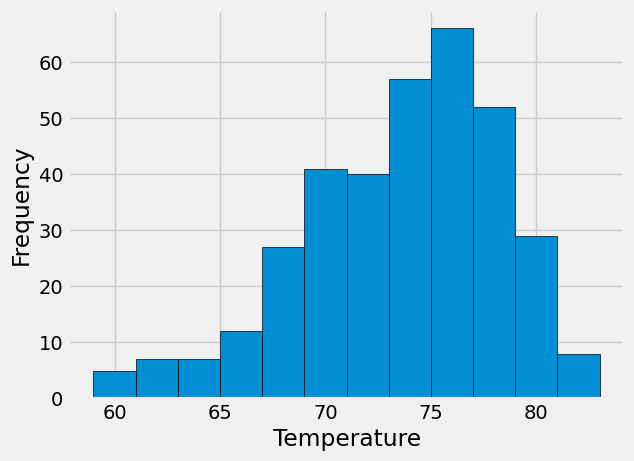

In [43]:
temperature_data = session.query(Measurment.tobs).\
    filter(Measurment.station == most_active_station_id).\
    filter(Measurment.date >= year_ago_date).all()

temperatures = [temp[0] for temp in temperature_data]

plt.hist(temperatures, bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [44]:
session.close()